In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import permutation_test_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
import sklearn

In [4]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

C:\Users\15634\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
xls = pd.ExcelFile("Jack_RawData.xlsx")
df_everyone = pd.read_excel(xls, 'Everyone')
df_control = pd.read_excel(xls, 'Control')
df_mci = pd.read_excel(xls, 'MCI')

In [8]:
df_mci

,SubjectID,Age,WMH_Pct_ICV,TB_Accuracy.2017_2015,TB_Accuracy.2014_2012,TB_Accuracy.2011_2009,TB_Accuracy.2008_2006,TB_Accuracy.2005_2003,TB_Accuracy.2002_1998,TB_Accuracy.1997_1993,TB_Accuracy.1992_1988,TB_Accuracy.1987_1983,TB_Accuracy.1982_1978,TB_Accuracy.1977_1973,TB_Accuracy.1972_1968,TB_Accuracy.1967_1963
0,82,75,0.06,0.70,0.65,0.55,0.65,0.70,0.50,0.65,0.55,0.5,0.75,0.75,0.6,0.75
1,91,66,0.07,0.70,0.45,0.70,0.55,0.60,0.60,0.60,0.70,0.7,0.75,0.50,1.0,0.50
2,93,72,0.11,0.45,0.50,0.55,0.50,0.50,0.40,0.45,0.55,0.4,0.38,0.38,0.7,0.50
3,30,69,0.12,0.80,0.50,0.45,0.60,0.80,0.80,0.75,0.60,0.8,1.00,1.00,1.0,0.50
4,73,77,0.14,0.65,0.55,0.50,0.45,0.55,0.60,0.55,0.65,0.3,0.50,0.50,0.6,0.50
5,64,66,0.18,0.55,0.75,0.70,0.60,0.60,0.60,0.45,0.50,0.4,0.50,0.63,0.3,0.75
6,77,72,0.20,0.65,0.65,0.50,0.50,0.55,0.55,0.55,0.55,0.4,0.63,0.38,0.5,0.38
7,2,69,0.27,0.65,0.70,0.65,0.80,0.65,0.55,0.45,0.75,0.7,0.88,0.88,0.8,0.75
8,92,66,0.27,0.60,0.70,0.65,0.75,0.60,0.65,0.65,0.70,0.8,0.88,0.63,0.9,1.00
9,65,71,0.29,0.40,0.50,0.35,0.70,0.75,0.60,0.55,0.60,0.5,0.50,0.50,0.4,0.63


In [7]:
df_mci['WMH_Pct_ICV'].tolist()

[0.06,
 0.07,
 0.11,
 0.12,
 0.14,
 0.18,
 0.2,
 0.27,
 0.27,
 0.29,
 0.31,
 0.32,
 0.34,
 0.37,
 0.37,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.52,
 0.53,
 0.54,
 0.55,
 0.66,
 0.79,
 1.08,
 1.12,
 1.24,
 1.25,
 1.45,
 1.45,
 1.46,
 1.91,
 2.25,
 2.41]

In [11]:
df = pd.read_excel("real_raw_data.xlsx")
df['timediff'] = df[df.columns[5]]
df = df.drop(df.columns[5], axis=1)
df['Int_Sex'] = df['Int_Sex'].apply(lambda x: 0 if x =='Female' else 1)
df.drop(["SubjectID", "Comorbidities_MedicalSum", "Comorbidities_MentalSum"], axis=1)

,Int_Sex,Education,Episodic_Z,Semantic_Z,Executive_Z,Attention_Z,Visuospatial_Z,TB_Accuracy.2017_2015,TB_Accuracy.2014_2012,TB_Accuracy.2011_2009,...,TB_Accuracy.2005_2003,TB_Accuracy.2002_1998,TB_Accuracy.1997_1993,TB_Accuracy.1992_1988,TB_Accuracy.1987_1983,TB_Accuracy.1982_1978,TB_Accuracy.1977_1973,TB_Accuracy.1972_1968,TB_Accuracy.1967_1963,timediff
0,1,12,-1.175714,0.61500,-0.250825,-0.538,0.148,0.65,0.70,0.65,...,0.65,0.55,0.45,0.75,0.7,0.875,0.875,0.8,0.750,40
1,1,16,0.528571,-0.34750,0.223325,-0.040,0.686,0.75,0.80,0.75,...,0.75,0.65,0.65,0.70,0.4,0.500,0.375,0.9,0.500,21
2,1,15,0.852857,0.70500,0.391675,0.040,0.130,0.40,0.45,0.40,...,0.20,0.55,0.50,0.60,0.3,0.500,0.500,0.5,0.875,0
3,0,14,0.751429,0.33750,-0.359175,-0.260,0.406,0.70,0.85,0.65,...,0.75,0.70,0.70,0.75,0.7,0.625,0.875,0.5,0.750,13
4,0,19,1.061429,-0.90500,0.835000,0.278,0.286,0.85,0.75,0.85,...,0.80,0.70,0.85,0.70,0.6,0.750,0.875,0.5,0.750,36
5,1,14,-0.275714,0.90000,0.499175,0.394,-0.074,0.90,0.75,0.80,...,0.70,0.65,0.75,0.80,0.6,0.750,0.875,0.7,0.500,66
6,1,18,-1.510000,-1.32500,-1.525000,-1.434,-0.688,0.40,0.45,0.30,...,0.45,0.35,0.45,0.30,0.3,0.000,0.250,0.7,0.750,28
7,1,16,0.694286,-0.26250,-0.082500,-0.194,0.386,0.75,0.75,0.80,...,0.80,0.60,0.85,0.75,0.8,0.875,0.875,0.9,0.875,8
8,1,18,1.190000,-0.08750,-0.165825,0.200,0.348,0.70,0.85,0.50,...,0.60,0.70,0.50,0.80,0.6,0.625,0.750,0.7,0.500,99
9,1,18,-0.165714,-0.12250,0.060000,-0.420,0.186,0.55,0.70,0.75,...,0.75,0.75,0.65,0.85,0.8,0.750,1.000,0.9,0.750,33


In [26]:
import matplotlib.pyplot as plt

In [33]:
reg = ols_reg(df.Episodic_Z, df["TB_Accuracy.2017_2015"])

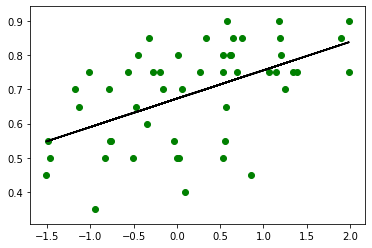

In [32]:
plt.scatter(df.Episodic_Z, df["TB_Accuracy.2014_2012"], color ='green')
plt.plot(df.Episodic_Z, reg.predict(), color = 'black')

In [38]:
from matplotlib.pyplot import figure


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

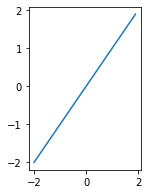

In [52]:
figure(figsize=(2, 3))
plt.plot([i*0.1 for i in range(-20, 20)], [i*0.1 for i in range(-20, 20)])

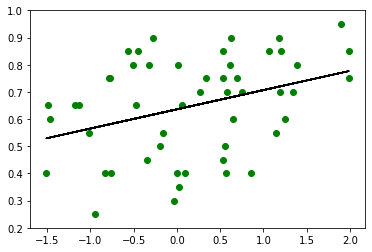

In [34]:
plt.scatter(df.Episodic_Z, df["TB_Accuracy.2017_2015"], color ='green')
plt.plot(df.Episodic_Z, reg.predict(), color = 'black')

In [7]:
df_lst = [df_everyone, df_control, df_mci]
df_clean_lst = []
wmh_lst = []
for df in df_lst:
    wmh_lst.append(df['WMH_Pct_ICV'])
    df = df.drop(["SubjectID", "Age", "WMH_Pct_ICV"], axis=1)
    df_clean_lst.append(df)

In [8]:
global corr_df

In [12]:
def l_reg(X, y):
    reg = LinearRegression()
    reg.fit(X, y)
    return reg.coef_[-1]

def after_shuffle_corr(X, y):
    X_shuf = X[['timediff', 'news']]
    X_remain = X.drop(['timediff', 'news'], axis=1)
    shuffled_X = X_remain.join(X_shuf.sample(frac=1).reset_index(drop=True))
    
    return reg.coef_[-1]

def df_split_time(df):
    output = []
    time_cols = df[df.columns[10:-2]]
    e_time_cols = df[['Int_Sex', 'Education', 'Comorbidities_MedicalSum', 'Comorbidities_MentalSum', 'timediff']]
    for col in time_cols.iteritems():
        to_add = e_time_cols.copy()
        to_add['news'] = col[1]
        output.append(to_add)
    
    return output

def ols_reg(X, y):
    diabetes = datasets.load_diabetes()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2

In [10]:
def perm(df, n):
    k = 0
    X =  np.array([1.000, 4.000, 7.000, 10.000, 13.000, 16.000, 21.000, 26.000, 31.000, 36.000, 41.000, 46.000, 51.000])
    df = df.drop(["SubjectID", "Age", "WMH_Pct_ICV"], axis=1)
    corr_df = df.corr()
    reg = ols_reg(X, y)
    r2 = reg.rsquared
    
    for i in range(n):
        new_df = sklearn.utils.shuffle(df)
        
        reg = ols_reg(time, new_coefs)
        r2_n = reg.rsquared
        k += r2 < r2_n    
    p = k / n
    return p

In [11]:
len(df_clean_lst)

3

In [44]:
R_s_lst = []

In [45]:
r2

0.5903431945565254

In [46]:
orig_lst = []

In [47]:
print(orig_lst[1].summary())

IndexError: list index out of range

In [5]:
df_everyone

,SubjectID,Age,WMH_Pct_ICV,TB_Accuracy.2017_2015,TB_Accuracy.2014_2012,TB_Accuracy.2011_2009,TB_Accuracy.2008_2006,TB_Accuracy.2005_2003,TB_Accuracy.2002_1998,TB_Accuracy.1997_1993,TB_Accuracy.1992_1988,TB_Accuracy.1987_1983,TB_Accuracy.1982_1978,TB_Accuracy.1977_1973,TB_Accuracy.1972_1968,TB_Accuracy.1967_1963
0,83,66,0.02,0.65,0.75,0.80,0.70,0.70,0.80,0.65,0.75,0.7,0.50,0.75,0.3,0.75
1,42,70,0.04,0.85,0.80,0.60,0.80,0.75,0.65,0.80,0.75,0.5,0.75,0.50,0.8,0.75
2,51,72,0.04,0.70,0.75,0.55,0.35,0.50,0.55,0.55,0.60,0.5,0.38,0.38,0.9,0.50
3,34,65,0.06,0.70,0.90,0.65,0.75,0.70,0.80,0.90,0.85,0.6,0.75,0.63,0.8,0.50
4,53,66,0.06,0.90,0.80,0.50,0.70,0.65,0.70,0.80,0.65,0.7,0.75,0.88,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,96,87,1.46,0.55,0.55,0.40,0.30,0.55,0.50,0.55,0.50,0.2,0.50,0.25,0.5,0.25
64,22,76,1.91,0.40,0.40,0.40,0.50,0.30,0.45,0.50,0.25,0.7,0.88,1.00,0.9,0.63
65,88,84,2.25,0.60,0.35,0.35,0.45,0.40,0.65,0.55,0.55,0.4,0.75,0.63,0.8,0.63
66,87,80,2.41,0.25,0.40,0.25,0.50,0.50,0.50,0.75,0.60,0.3,0.63,0.38,0.7,0.38


In [48]:
n = 500
p_lst = []
for idx in range(len(df_clean_lst)):
    df = df_clean_lst[idx]
    X =  np.array([1.000, 4.000, 7.000, 10.000, 13.000, 16.000, 21.000, 26.000, 31.000, 36.000, 41.000, 46.000, 51.000])
    x = wmh_lst[idx].values
    k = 0
    coef_lst = []

    for i in range(13):
        y = df.iloc[:, i].values
        reg = ols_reg(x, y)
        coef_lst.append(reg.params[-1])

    time_reg = ols_reg(X, coef_lst)
    r2 = time_reg.rsquared
    orig_lst.append(coef_lst)
    print(r2)

    for t in range(n):
        new_df = df.sample(frac=1, axis=1)
        new_coefs = []

        for i in range(13):
            y = new_df.iloc[:, i].values
            new_reg = ols_reg(x, y)
            new_coefs.append(new_reg.params[-1])

        new_time_reg = ols_reg(X, new_coefs)
        r2_n = new_time_reg.rsquared
        R_s_lst.append(r2_n)
        k += (abs(r2) <= abs(r2_n))
    
    p = k / n
    print(p)
    p_lst.append(p)

0.7502769456044327
0.0
0.4407618357200087
0.014
0.5903431945565254
0.004


In [50]:
p_lst

[0.0, 0.014, 0.004]

(array([289.,  87.,  69.,  25.,  12.,   7.,   4.,   6.,   0.,   1.]),
 array([2.36955205e-06, 6.61490093e-02, 1.32295649e-01, 1.98442289e-01,
        2.64588929e-01, 3.30735569e-01, 3.96882208e-01, 4.63028848e-01,
        5.29175488e-01, 5.95322128e-01, 6.61468767e-01]),
 <BarContainer object of 10 artists>)

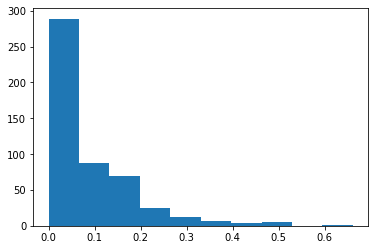

In [51]:
plt.hist(R_s_lst[500:1000])

In [53]:
orig_lst[1]

[-0.008722115601093941,
 -0.15180653277012207,
 -0.021490411183200733,
 -0.07561397238836406,
 -0.053639436557629955,
 -0.06436889825825345,
 -0.06545129076290185,
 -0.030676971568107447,
 -0.0475071910222037,
 0.01608395902180046,
 0.023648898636106586,
 -0.022734178570360433,
 0.06305743213989382]

In [186]:
time_reg = ols_reg(X, coef_lst)

In [187]:
time_reg.summary()

C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                   0.07689
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.787
Time:                        14:00:06   Log-Likelihood:                -19.828
No. Observations:                  13   AIC:                             43.66
Df Residuals:                      11   BIC:                             44.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2054      0.594     -0.346      0.736      -1.513       1.102
x1             0.0058      0.021      0.277      0.787      -0.040       0.052
==============================================================================
Omnibus:                        9.055   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.197
Skew:                          -0.942   Prob(JB):                       0.0744
Kurtosis:                       5.459   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
coef_lst

[-0.008722115601093941,
 -0.15180653277012207,
 -0.021490411183200733,
 -0.07561397238836406,
 -0.053639436557629955,
 -0.06436889825825345,
 -0.06545129076290185,
 -0.030676971568107447,
 -0.0475071910222037,
 0.01608395902180046,
 0.023648898636106586,
 -0.022734178570360433,
 0.06305743213989382]

In [183]:
lr = sklearn.linear_model.LinearRegression().fit(new_df, x)

In [185]:
coef_lst = lr.coef_

In [180]:
time_reg.summary()

C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     8.670
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0133
Time:                        13:53:51   Log-Likelihood:                 23.930
No. Observations:                  13   AIC:                            -43.86
Df Residuals:                      11   BIC:                            -42.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0836      0.021     -4.078      0.002      -0.129      -0.038
x1             0.0021      0.001      2.944      0.013       0.001       0.004
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   2.874
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.087
Skew:                           0.009   Prob(JB):                        0.957
Kurtosis:                       2.600   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
new_time_reg.summary()

C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                  0.008884
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.927
Time:                        13:53:38   Log-Likelihood:                 20.158
No. Observations:                  13   AIC:                            -36.32
Df Residuals:                      11   BIC:                            -35.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0317      0.027     -1.154      0.273      -0.092       0.029
x1         -9.154e-05      0.001     -0.094      0.927      -0.002       0.002
==============================================================================
Omnibus:                        1.846   Durbin-Watson:                   2.720
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                0.384
Skew:                          -0.364   Prob(JB):                        0.825
Kurtosis:                       3.422   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
p_lst

[0.0, 0.01, 0.0]

In [9]:
y = df['Episodic_Z']
perm(df, y, 1000)

The p-value is: 


0.005

In [10]:
y = df['Semantic_Z']
perm(df, y, 1000)

The p-value is: 


0.826

In [11]:
y = df['Executive_Z']
perm(df, y, 1000)

The p-value is: 


0.305

In [12]:
y = df['Attention_Z']
perm(df, y, 1000)

The p-value is: 


0.253

In [13]:
y = df['Visuospatial_Z']
perm(df, y, 1000)

The p-value is: 


0.039